In [52]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
# ignore warnings
import warnings

warnings.filterwarnings('ignore')

In [53]:
column_names = [
"address",
"price",
"gross_tax",
"strata_maintenance_fees",
"bedrooms",
"bathrooms",
"property_type",
"property_age",
"title",
"style",
"heating_type",
"feature",
"amenities",
"appliances",
"community",
"days_on_rew",
"property_views",
"mls®_number",
"source",
'frontage', 
'lot_size', 
'year_built', 
'depth',
'half_bathrooms'
]



# Get average housing price per city

In [54]:

def get_df(file_path, apply_columns=True):

    sys.path.append(file_path)

    data = pd.read_csv(file_path, on_bad_lines='skip')

    # data.dropna(inplace=True)
    if apply_columns:
        data.columns = column_names
    return data



folder = "../data/raw_2023_04_19/"

filenames = {
    "burnaby": "burnaby_real_estate_data.csv",
    "langley":"langley_real_estate_data.csv",
    "richmond":"richmond_real_estate_data.csv",
    "maple_ridge":"maple-ridge_real_estate_data.csv",
    "surrey":"surrey_real_estate_data.csv",
    "new_west": "new-westminster_real_estate_data.csv",
    "vancouver":"vancouver_real_estate_data.csv",
    "coquitlam":"coquitlam_real_estate_data.csv",
    "north_vancouver":"north-vancouver_real_estate_data.csv",
    "west_vancouver":"west-vancouver_real_estate_data.csv",
    "delta":"delta_real_estate_data.csv",
    "pitt_meadows":"pitt-meadows_real_estate_data.csv",
    "kelowna":"kelowna_real_estate_data.csv",
    "port_coquitlam":"port-coquitlam_real_estate_data.csv"
}

dataframes = {}

for k,v in filenames.items():
    dataframes[k] = get_df(folder + v)

dataframes.keys()



dict_keys(['burnaby', 'langley', 'richmond', 'maple_ridge', 'surrey', 'new_west', 'vancouver', 'coquitlam', 'north_vancouver', 'west_vancouver', 'delta', 'pitt_meadows', 'kelowna', 'port_coquitlam'])

In [55]:
# get neighbourhoods per city

neighbourhoods_city = {}

for city, df in dataframes.items():
    
    neighbourhoods = df['community'].unique()
    for neighbourhood in neighbourhoods:

        neighbourhoods_city[neighbourhood] = city

neighbourhoods_city

{'burnaby lake': 'burnaby',
 'metrotown': 'burnaby',
 'highgate': 'burnaby',
 'sullivan heights': 'burnaby',
 'central park': 'burnaby',
 'simon fraser hills': 'burnaby',
 'government road': 'burnaby',
 'capitol hill': 'burnaby',
 'brentwood park': 'burnaby',
 'parkcrest': 'burnaby',
 'east burnaby': 'burnaby',
 'forest glen': 'burnaby',
 'simon fraser university': 'burnaby',
 'central burnaby north': 'burnaby',
 'south slope': 'burnaby',
 'montecito': 'burnaby',
 'upper deer lake': 'burnaby',
 'the crest': 'burnaby',
 'big bend': 'burnaby',
 'burnaby hospital': 'burnaby',
 'sperling-duthie': 'burnaby',
 'edmonds': 'burnaby',
 'cariboo': 'burnaby',
 'vancouver heights': 'burnaby',
 'westridge': 'burnaby',
 'oaklands': 'burnaby',
 'suncrest': 'burnaby',
 'willingdon heights': 'burnaby',
 'deer lake': 'burnaby',
 'forest hills': 'burnaby',
 'oakdale': 'burnaby',
 'buckingham heights': 'burnaby',
 'deer lake place': 'burnaby',
 'greentree village': 'burnaby',
 'salmon river': 'langley',
 

In [56]:
# find out which city the row is in
clean_combined_data = get_df(file_path=folder + "clean_combined_data.csv", apply_columns=False)

clean_combined_data['city'] = clean_combined_data['community'].apply(lambda x: neighbourhoods_city.get(x, 'unknown'))

In [57]:
clean_combined_data.columns

Index(['address', 'price', 'gross_tax', 'strata_maintenance_fees', 'bedrooms',
       'bathrooms', 'property_type', 'property_age', 'title', 'heating_type',
       'feature', 'amenities', 'appliances', 'community', 'days_on_rew',
       'property_views', 'mls®_number', 'source', 'frontage', 'lot_size',
       'year_built', 'depth', 'half_bathrooms', 'lot_width', 'lot_length',
       'age', 'bungalow', 'storey', 'basement', 'laneway_house', 'garage',
       'split_entry', 'city'],
      dtype='object')

In [58]:
clean_combined_data.groupby('city').count()


,address,price,gross_tax,strata_maintenance_fees,bedrooms,bathrooms,property_type,property_age,title,heating_type,...,half_bathrooms,lot_width,lot_length,age,bungalow,storey,basement,laneway_house,garage,split_entry
city,,,,,,,,,,,,,,,,,,,,,
burnaby,120,120,120,0,120,120,120,0,120,102,...,120,101,101,117,120,120,120,120,120,120
coquitlam,182,182,182,9,182,182,182,0,182,156,...,181,105,105,179,182,182,182,182,182,182
delta,268,268,268,8,268,268,268,0,268,226,...,259,194,194,260,268,268,268,268,268,268
kelowna,61,61,61,9,61,60,61,0,58,39,...,60,0,0,60,61,61,61,61,61,61
langley,192,192,192,9,192,192,192,0,192,174,...,189,119,119,188,192,192,192,192,192,192
maple_ridge,236,236,236,6,236,236,236,0,236,202,...,231,129,129,229,236,236,236,236,236,236
new_west,63,63,63,2,63,63,63,0,63,43,...,61,46,46,56,63,63,63,63,63,63
north_vancouver,167,167,167,5,167,167,167,0,167,138,...,165,129,129,164,167,167,167,167,167,167
pitt_meadows,19,19,19,0,19,19,19,0,19,17,...,19,12,12,18,19,19,19,19,19,19


City,Average Price
west_vancouver,"5,536,074"
vancouver,"3,650,319"
richmond,"3,012,453"
langley,"2,883,940"
north_vancouver,"2,724,911"
pitt_meadows,"2,590,511"
burnaby,"2,552,369"
surrey,"2,477,063"
coquitlam,"2,273,790"
delta,"2,094,613"


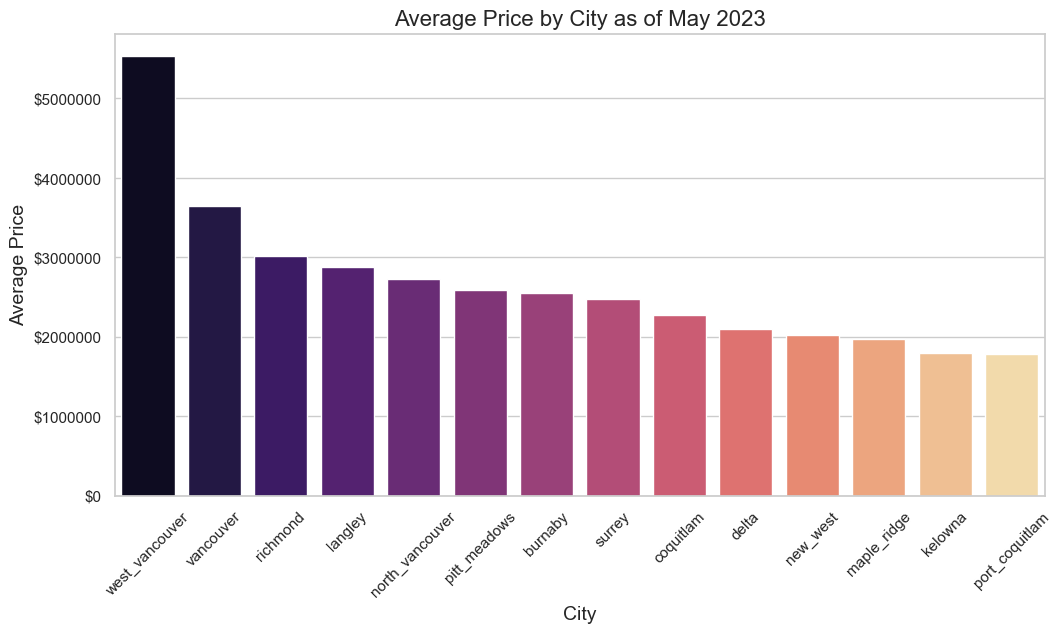

In [59]:

from matplotlib.ticker import FuncFormatter


# Group the data by the 'city' column and calculate the mean of the 'price' column
average_price_by_city = clean_combined_data.groupby('city')['price'].mean()

# Sort the average prices in descending order
average_price_by_city_sorted = average_price_by_city.sort_values(ascending=False)

# Create a DataFrame from the sorted average prices
average_price_by_city_df = pd.DataFrame(average_price_by_city_sorted).reset_index()

# Rename the columns for better readability
average_price_by_city_df.columns = ['City', 'Average Price']

# Display the sorted average prices as a table
display(average_price_by_city_df.style.hide_index().format({"Average Price": "{:,.0f}"}))


# Function to format the y-axis values
def currency_fmt(x, pos):
    return f"${x:.0f}"


# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the sorted average price for each city using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='City', y='Average Price', data=average_price_by_city_df, palette="magma")

# Set the title and labels for the plot
ax.set_title('Average Price by City as of May 2023', fontsize=16)
ax.set_xlabel('City', fontsize=14)
ax.set_ylabel('Average Price', fontsize=14)

# Format the y-axis values as currency
formatter = FuncFormatter(currency_fmt)
ax.yaxis.set_major_formatter(formatter)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Average Number of Bedrooms for each City

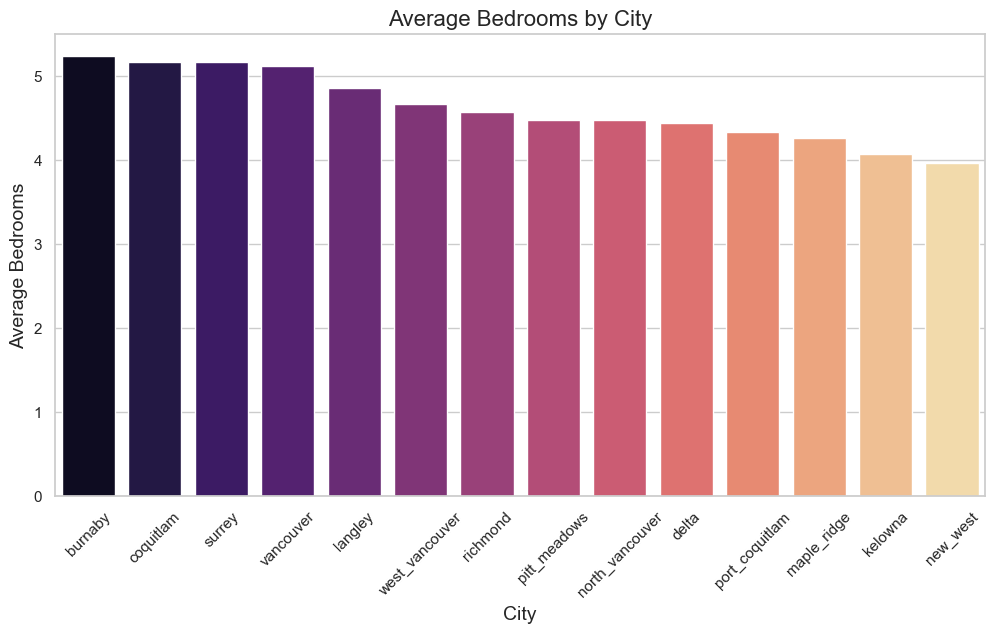

In [60]:
# Group the data by the 'city' column and calculate the mean of the 'bedrooms' column
average_bedrooms_by_city = clean_combined_data.groupby('city')['bedrooms'].mean()

# Sort the average bedrooms in descending order
average_bedrooms_by_city_sorted = average_bedrooms_by_city.sort_values(ascending=False)

# Create a DataFrame from the sorted average bedrooms
average_bedrooms_by_city_df = pd.DataFrame(average_bedrooms_by_city_sorted).reset_index()

# Rename the columns for better readability
average_bedrooms_by_city_df.columns = ['City', 'Average Bedrooms']

# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the sorted average bedrooms for each city using Seaborn with reversed colors
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='City', y='Average Bedrooms', data=average_bedrooms_by_city_df, palette="magma")

# Set the title and labels for the plot
ax.set_title('Average Bedrooms by City', fontsize=16)
ax.set_xlabel('City', fontsize=14)
ax.set_ylabel('Average Bedrooms', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

               City  Average Lot Size
0    west_vancouver      14765.329060
1           langley      10502.459770
2            surrey       9649.629630
3       maple_ridge       9350.254545
4          richmond       8679.219512
5             delta       8489.391304
6   north_vancouver       8273.891473
7         coquitlam       8170.586538
8           burnaby       7249.700000
9          new_west       7077.260870
10   port_coquitlam       6496.054054
11        vancouver       6230.841584
12     pitt_meadows       5006.375000
13          kelowna               NaN


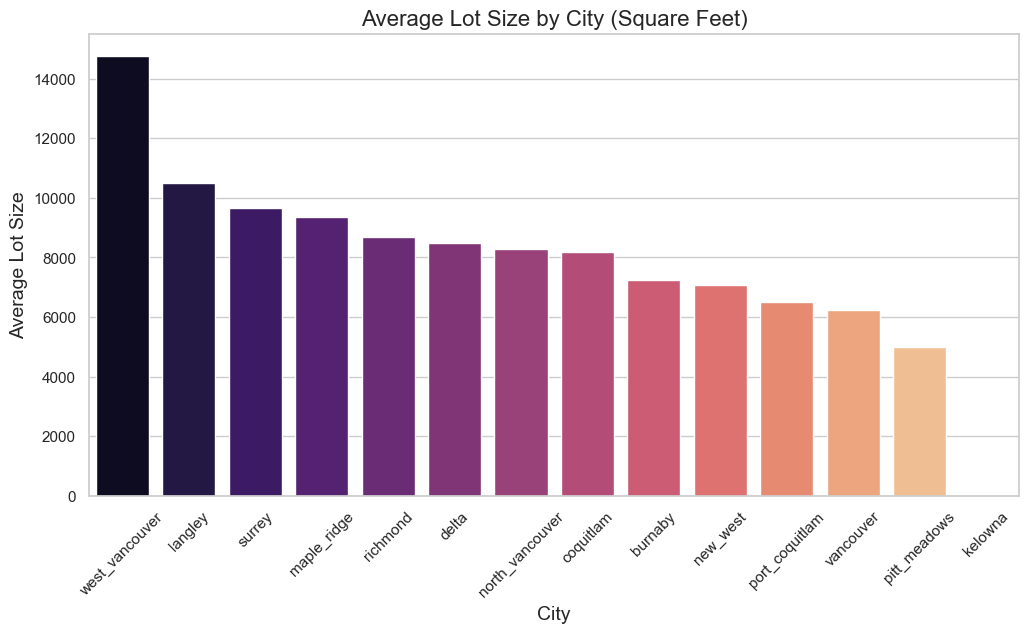

In [61]:
# Group the data by the 'city' column and calculate the mean of the 'lot_size' column
average_lot_size_by_city = clean_combined_data.groupby('city')['lot_size'].mean()

# Sort the average lot sizes in descending order
average_lot_size_by_city_sorted = average_lot_size_by_city.sort_values(ascending=False)

# Create a DataFrame from the sorted average lot sizes
average_lot_size_by_city_df = pd.DataFrame(average_lot_size_by_city_sorted).reset_index()

# Rename the columns for better readability
average_lot_size_by_city_df.columns = ['City', 'Average Lot Size']
print(average_lot_size_by_city_df)
# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the sorted average lot sizes for each city using Seaborn with reversed colors
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='City', y='Average Lot Size', data=average_lot_size_by_city_df, palette="magma")

# Set the title and labels for the plot
ax.set_title('Average Lot Size by City (Square Feet)', fontsize=16)
ax.set_xlabel('City', fontsize=14)
ax.set_ylabel('Average Lot Size', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Proportion of newer homes

Investigate whether certain cities or communities have a higher proportion of newer homes, which could indicate areas with more recent development or growth. Identifying these areas can be useful for buyers looking for modern homes or investors seeking areas with potential for future appreciation.



kelowna            45.901639
richmond           28.313253
west_vancouver     25.076453
langley            25.000000
maple_ridge        23.305085
delta              22.761194
burnaby            22.500000
new_west           22.222222
surrey             21.759259
coquitlam          20.879121
port_coquitlam     16.666667
north_vancouver    14.371257
vancouver          14.159292
pitt_meadows        5.263158
dtype: float64


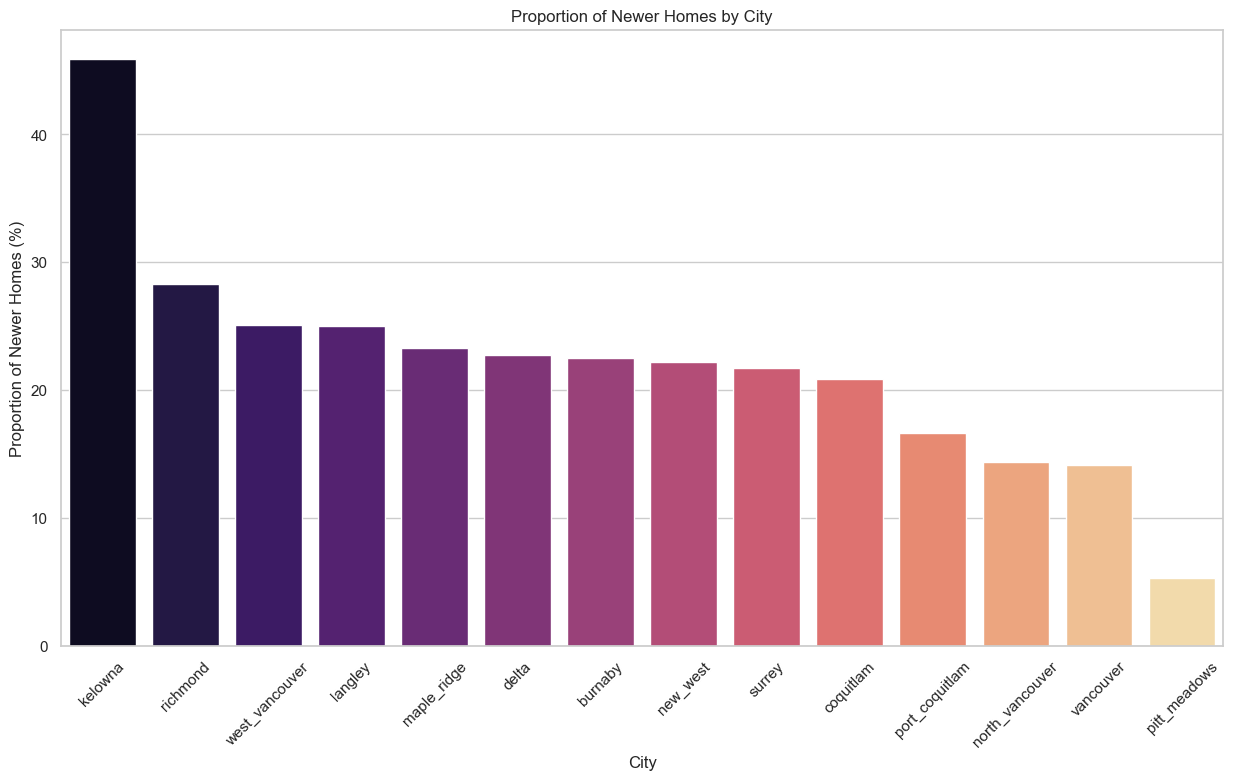

In [62]:
# Define a threshold for 'newer' homes (e.g., homes less than 10 years old)
df = clean_combined_data
age_threshold = 10

# Calculate the number of newer homes in each city or community
df['is_newer'] = df['age'] <= age_threshold
newer_homes_by_city = df.groupby('city')['is_newer'].sum()

# Calculate the total number of homes in each city or community
total_homes_by_city = df['city'].value_counts()

# Calculate the proportion of newer homes in each city or community
proportion_of_newer_homes = (newer_homes_by_city / total_homes_by_city) * 100

# Sort the cities by the proportion of newer homes
sorted_cities = proportion_of_newer_homes.sort_values(ascending=False)

# Display the results
print(sorted_cities)

# Convert the sorted Series to a DataFrame
sorted_cities_df = sorted_cities.reset_index()
sorted_cities_df.columns = ['city', 'proportion_of_newer_homes']

# Plot the data using Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='city', y='proportion_of_newer_homes', data=sorted_cities_df, palette="magma")
# sns.barplot(x='city', y='proportion_of_newer_homes', data=sorted_cities_df)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Proportion of Newer Homes (%)')
plt.title('Proportion of Newer Homes by City')
plt.show()

# Tax

## Average Tax Amount

               City  Average Gross Tax
0    west_vancouver       14178.281346
1         vancouver       12135.778761
2   north_vancouver        7362.862275
3            surrey        6592.555556
4      pitt_meadows        6459.526316
5          richmond        6125.843373
6           langley        6107.937500
7           burnaby        5983.925000
8       maple_ridge        5471.016949
9          new_west        5357.523810
10        coquitlam        5238.697802
11            delta        4731.742537
12   port_coquitlam        3976.766667
13          kelowna           0.000000


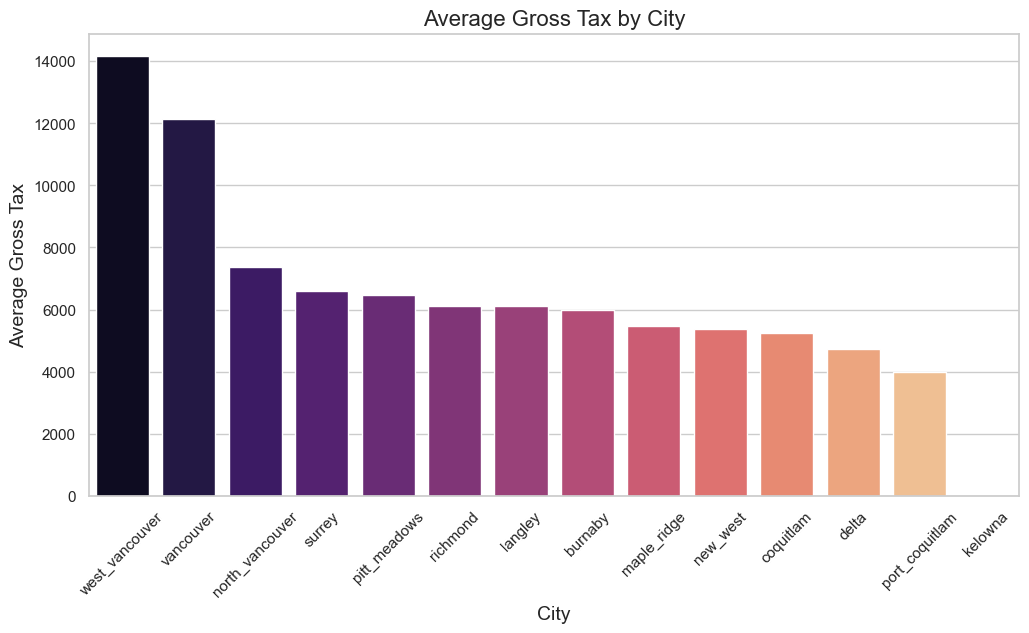

In [63]:
# Group the data by the 'city' column and calculate the mean of the 'gross_tax' column
average_gross_tax_by_city = clean_combined_data.groupby('city')['gross_tax'].mean()

# Sort the average gross tax in descending order
average_gross_tax_by_city_sorted = average_gross_tax_by_city.sort_values(ascending=False)

# Create a DataFrame from the sorted average gross tax
average_gross_tax_by_city_df = pd.DataFrame(average_gross_tax_by_city_sorted).reset_index()

# Rename the columns for better readability
average_gross_tax_by_city_df.columns = ['City', 'Average Gross Tax']

print(average_gross_tax_by_city_df)

# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the sorted average gross tax for each city using Seaborn with reversed colors
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='City', y='Average Gross Tax', data=average_gross_tax_by_city_df, palette="magma")

# Set the title and labels for the plot
ax.set_title('Average Gross Tax by City', fontsize=16)
ax.set_xlabel('City', fontsize=14)
ax.set_ylabel('Average Gross Tax', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


## Tax Scatter plot

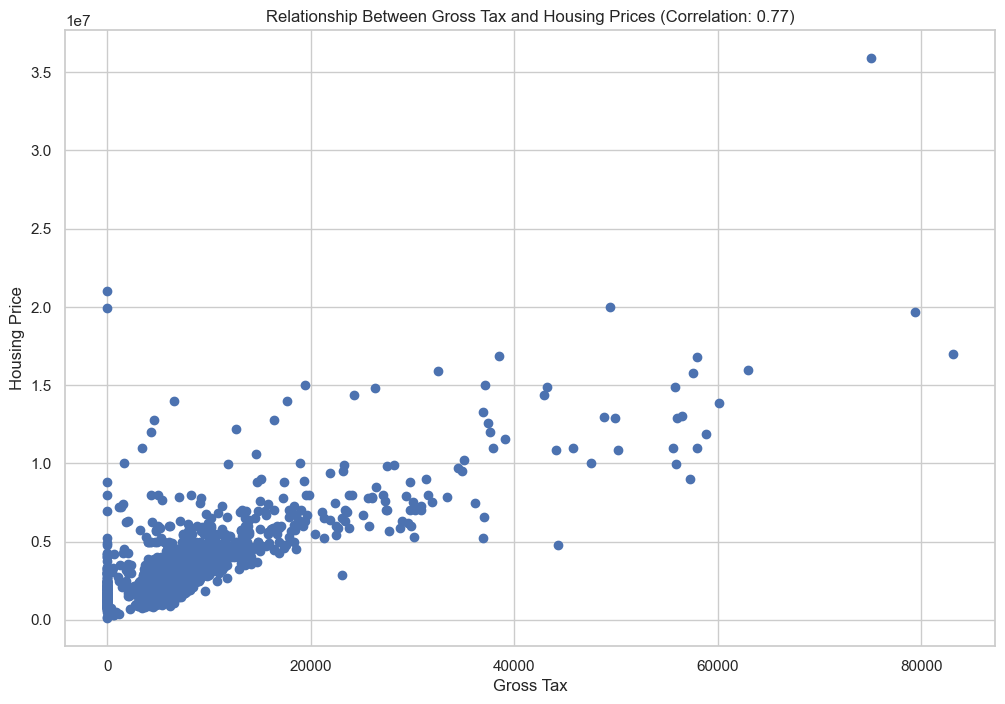

In [64]:
# Compute the correlation coefficient
correlation = df['gross_tax'].corr(df['price'])

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df['gross_tax'], df['price'])
plt.xlabel('Gross Tax')
plt.ylabel('Housing Price')
plt.title(f'Relationship Between Gross Tax and Housing Prices (Correlation: {correlation:.2f})')

# Display the plot
plt.show()

## Tax Percentage

               city  tax_percentage
0           burnaby        0.234446
1         coquitlam        0.230395
2             delta        0.225901
3           kelowna        0.000000
4           langley        0.211791
5       maple_ridge        0.276570
6          new_west        0.264350
7   north_vancouver        0.270206
8      pitt_meadows        0.249353
9    port_coquitlam        0.222315
10         richmond        0.203351
11           surrey        0.266144
12        vancouver        0.332458
13   west_vancouver        0.256107


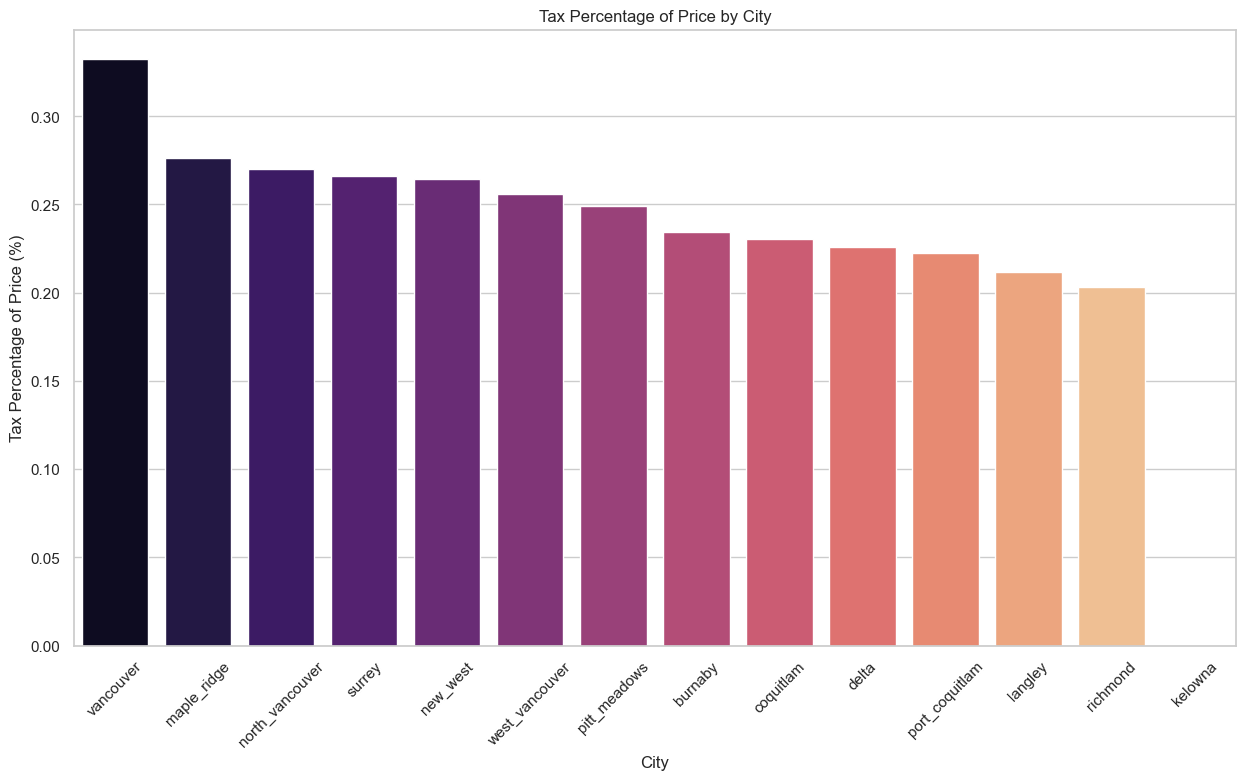

In [65]:
# Group the data by city and calculate the total gross tax and total housing prices
grouped_data = df.groupby('city').agg({'gross_tax': 'sum', 'price': 'sum'})

# Calculate the tax percentage of the price per city
grouped_data['tax_percentage'] = (grouped_data['gross_tax'] / grouped_data['price']) * 100

# Reset the index to have city as a column
tax_percentage_by_city = grouped_data.reset_index()

# Display the tax percentage by city
print(tax_percentage_by_city[['city', 'tax_percentage']])

tax_percentage_by_city = tax_percentage_by_city.sort_values(ascending=False, by='tax_percentage')


# Plot the tax percentage by city using Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='city', y='tax_percentage', data=tax_percentage_by_city, palette="magma")
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Tax Percentage of Price (%)')
plt.title('Tax Percentage of Price by City')

# Display the plot
plt.show()

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

mldf = df

# Prepare the data
# Convert categorical features (such as 'bungalow', 'storey', 'basement', 'garage', 'laneway_house', 'split_entry') to numeric values (1 for True, 0 for False)
mldf['bungalow'] = mldf['bungalow'].astype(int)
mldf['storey'] = mldf['storey'].astype(int)
mldf['basement'] = mldf['basement'].astype(int)
mldf['garage'] = mldf['garage'].astype(int)
mldf['laneway_house'] = mldf['laneway_house'].astype(int)
mldf['split_entry'] = mldf['split_entry'].astype(int)

mldf
# Calculate lot size (lot_width * lot_length)
mldf['lot_size'] = mldf['lot_width'] * mldf['lot_length']

mldf = mldf.dropna()
# Define the features (X) and the target variable (y)
features = ['bedrooms', 'bathrooms', 'lot_size', 'age', 'bungalow', 'storey', 'basement', 'garage', 'laneway_house', 'split_entry']
X = mldf[features]
y = mldf['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = model.predict(X_test)

# Calculate the model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model performance metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Display the feature importances (regression coefficients)
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.coef_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)




ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

         Feature     Importance
1      bathrooms  917825.641710
4       bungalow  249403.041274
5         storey  183276.158190
6       basement  175004.053919
3            age    5478.609257
2       lot_size       0.000195
7         garage  -85268.199869
8  laneway_house -275468.547786
9    split_entry -278058.179433
0       bedrooms -378487.248725


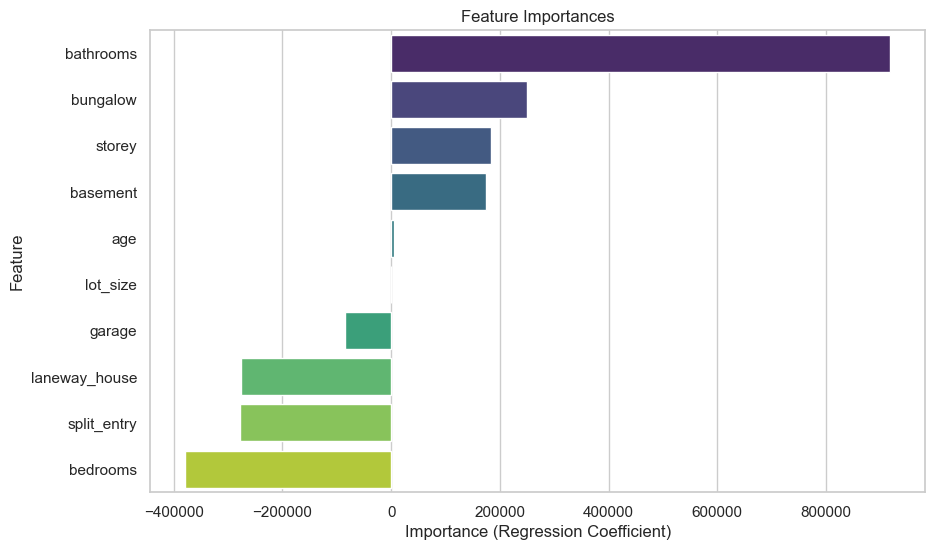

In [ ]:
# Display the feature importances (regression coefficients)
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.coef_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot the feature importances using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance (Regression Coefficient)')
plt.ylabel('Feature')
plt.show()

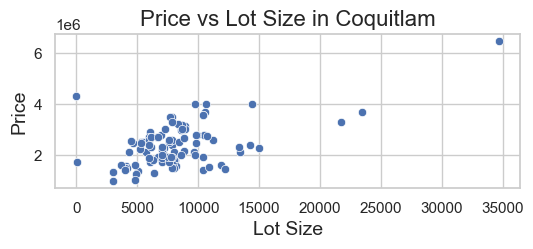

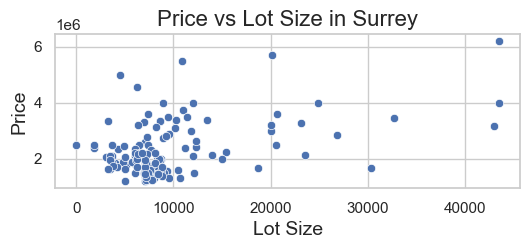

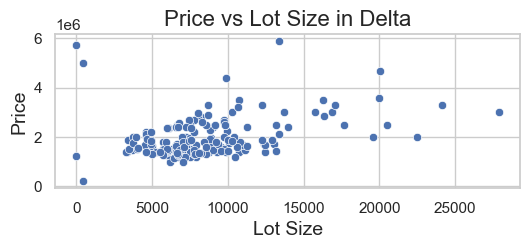

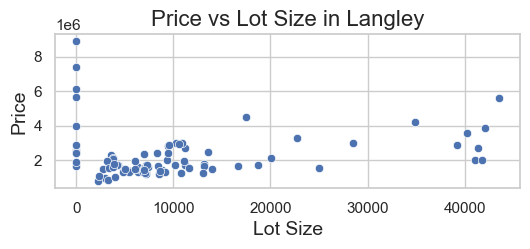

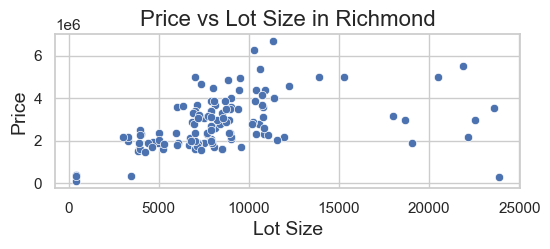

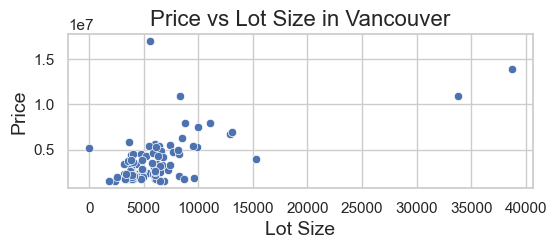

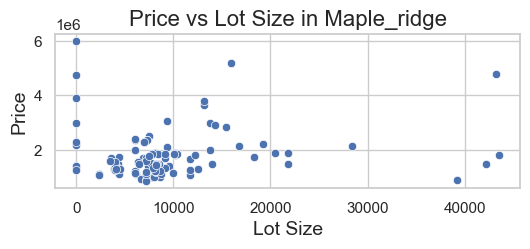

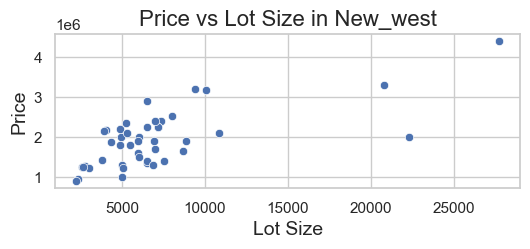

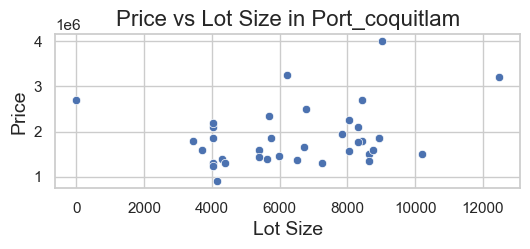

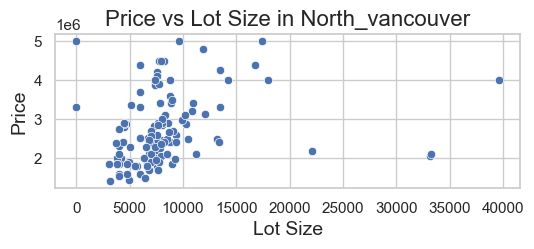

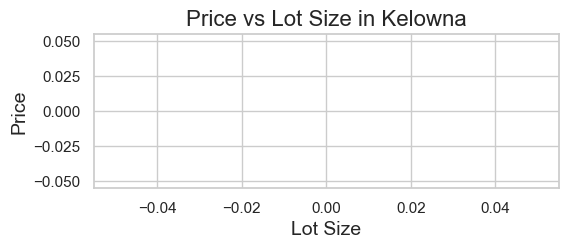

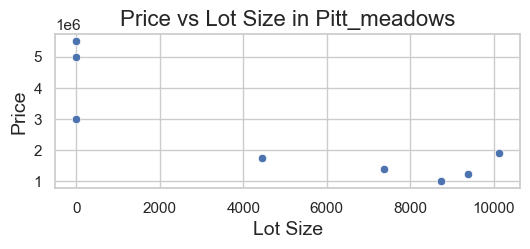

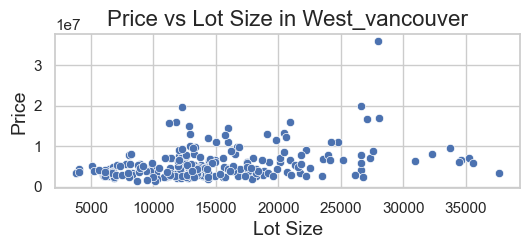

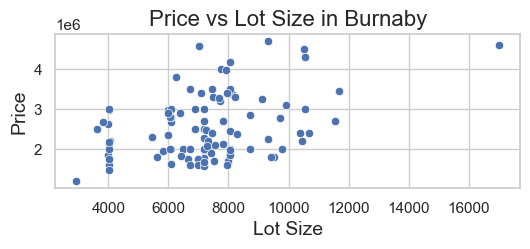

In [ ]:

# Get the unique city names
unique_cities = clean_combined_data['city'].unique()

# Set the Seaborn style
sns.set(style="whitegrid")

# Loop through the unique cities and create a scatter plot for each city
for city in unique_cities:
    # Filter the data for the rows where the 'city' column equals the current city
    city_data = clean_combined_data[clean_combined_data['city'] == city]

    # Create a scatter plot for price vs lot size using Seaborn with the filtered data
    plt.figure(figsize=(6, 2))
    ax = sns.scatterplot(x='lot_size', y='price', data=city_data)

    # Set the title and labels for the plot
    ax.set_title(f'Price vs Lot Size in {city.capitalize()}', fontsize=16)
    ax.set_xlabel('Lot Size', fontsize=14)
    ax.set_ylabel('Price', fontsize=14)

    # Display the plot
    plt.show()

In [ ]:
# Select the specified columns
selected_columns = ['address', 'price', 'gross_tax', 'bedrooms',
                    'bathrooms', 'property_type', 
                    'community', 'lot_size', 'half_bathrooms', 'lot_width', 'lot_length',
                    'age', 'bungalow', 'storey', 'basement', 'laneway_house', 'garage',
                    'split_entry', 'city']

df = clean_combined_data[selected_columns]



In [ ]:
df.describe()

,price,gross_tax,bedrooms,bathrooms,lot_size,half_bathrooms,lot_width,lot_length,age,bungalow,storey,basement,laneway_house,garage,split_entry
count,2.190000e+03,2190.000000,2190.000000,2188.000000,1398.000000,2152.000000,1481.000000,1481.000000,2131.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,2.926310e+06,7205.701826,4.688584,3.215722,9447.022890,0.685409,131.682647,131.682647,38.237916,0.075342,1.460274,0.300457,-0.042922,-0.212329,-0.016895
std,2.332737e+06,7384.913882,1.690758,1.705605,6534.227638,0.684565,1641.237829,1641.237829,27.491018,0.403598,1.301165,0.550883,0.220018,0.761771,0.275690
min,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.649000e+06,4443.250000,4.000000,2.000000,6027.250000,0.000000,49.000000,49.000000,12.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000
50%,2.250000e+06,5585.000000,5.000000,3.000000,7765.000000,1.000000,64.000000,64.000000,38.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,3.299975e+06,7577.250000,6.000000,4.000000,10817.750000,1.000000,82.000000,82.000000,57.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,3.588800e+07,83097.000000,14.000000,11.000000,43560.000000,6.000000,62631.000000,62631.000000,132.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Drop rows where the 'gross_tax' column is equal to 0
df = df[df['gross_tax'] != 0]
df = df[df['lot_size'] != 0]




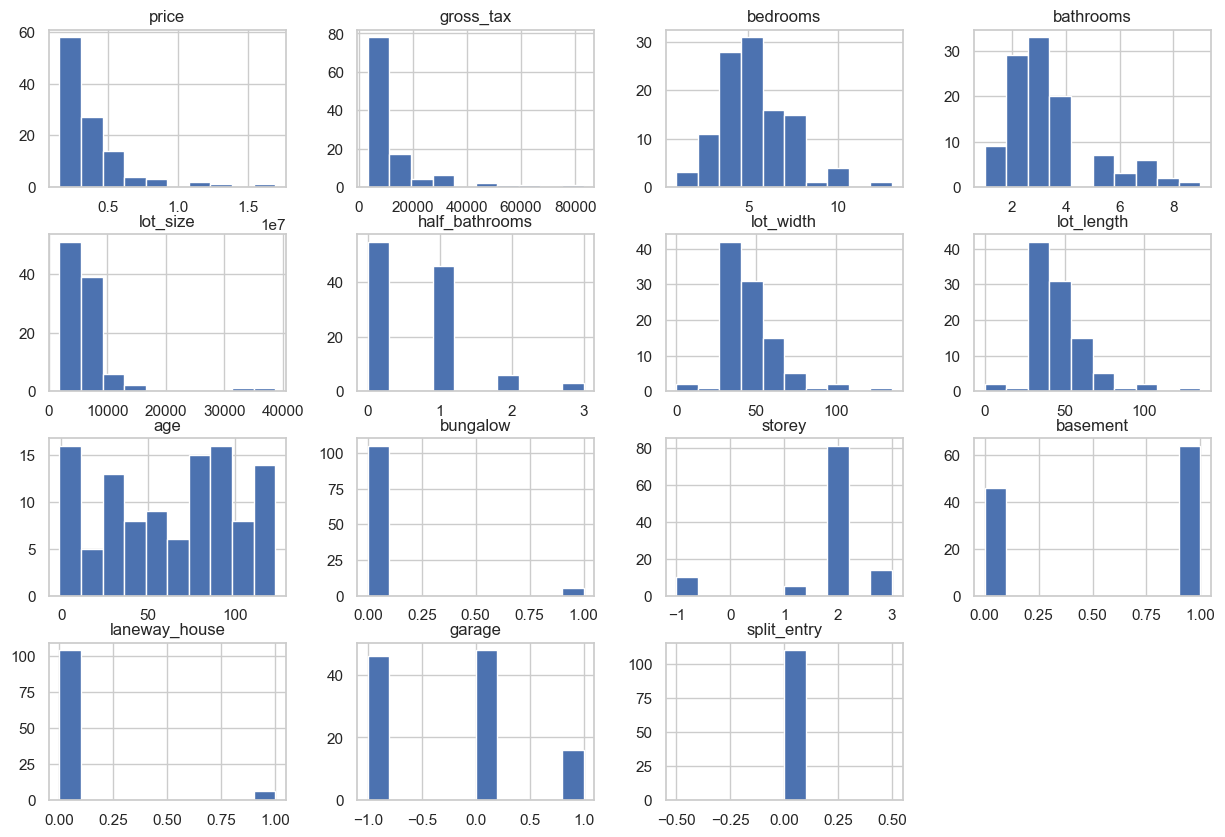

In [ ]:

# Get the unique city names
unique_cities = df['city'].unique()
unique_cities = ['vancouver']

# Set the Seaborn style
sns.set(style="whitegrid")

# Loop through the unique cities and create a histogram for each city
for city in unique_cities:
    # Filter the data for the rows where the 'city' column equals the current city
    city_data = df[df['city'] == city]
    city_data.hist(figsize=(15,10))
    # Create a histogram for the price column in the filtered data
    # plt.figure(figsize=(12, 6))
    # ax = sns.histplot(data=city_data, x='price', bins=50)

    # # Set the title and labels for the plot
    # ax.set_title(f'Price Distribution in {city.capitalize()}', fontsize=16)
    # ax.set_xlabel('Price', fontsize=14)
    # ax.set_ylabel('Frequency', fontsize=14)

    # Display the plot
    plt.show()

<AxesSubplot:>

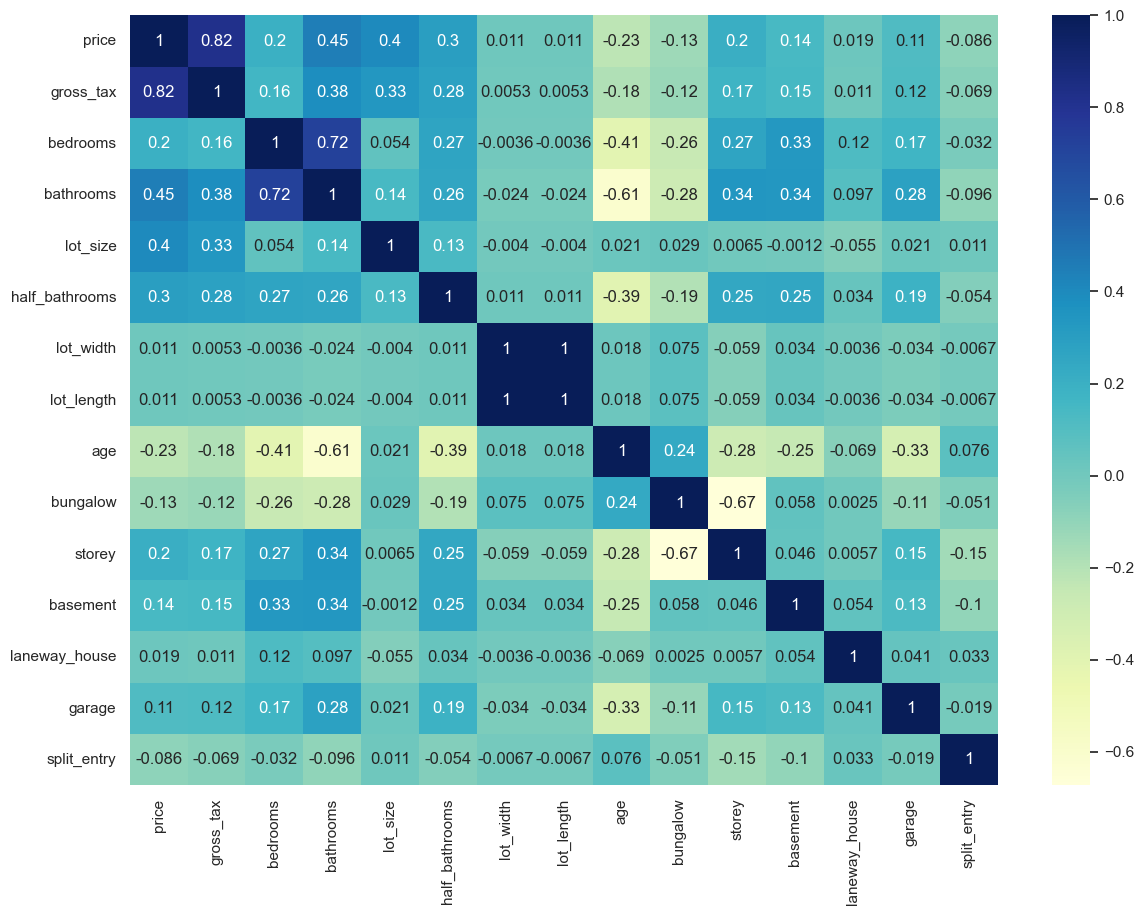

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [107]:
import folium
import pandas as pd
import branca.colormap as cm
import matplotlib.pyplot as plt

# Read the data into a DataFrame
df = pd.read_csv('../data/clean_housing_data_with_longlat.csv')

# Normalize price for color mapping
max_price = df['price'].max()
min_price = df['price'].min()
df['norm_price'] = df['price'] / max_price

colormap = folium.LinearColormap(colors=['white','red'], vmin=df['price'].min(), vmax=df['price'].max()).to_step(4)
colormap.caption = 'House Prices'

# Create a map centered around Greater Vancouver
m = folium.Map(location=[49.20, -123.0000], tiles='Cartodb Positron', zoom_start=11)
m.add_child(colormap)

# Loop through the data and add each data point to the map
for i, row in df.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']): # Only plot the data points that have Lat/Lon
        # Define color based on price, more expensive houses will be darker
        color = plt.cm.Reds(row['norm_price'])
        color = mpl.colors.to_hex(color)
        
        # Create popup text
        popup_text = f"Price: ${row['price']:,.0f}"
        popup = folium.Popup(popup_text, max_width=300)

        folium.CircleMarker(
            [row['latitude'], row['longitude']],
            radius=5,
            color=color,
            fill=True,
            popup=popup
        ).add_to(m)

# Save the map to an HTML file
m.save('map.html')


In [87]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium.plugins import FloatImage, MarkerCluster, HeatMap
from folium import plugins

# Normalize price for color mapping
max_price = df['price'].max()
df['norm_price'] = df['price'] / max_price

# Create a map centered around Greater Vancouver
m = folium.Map(location=[49.2827, -123.1207], tiles='Cartodb Positron', zoom_start=10)

# Create a colormap 
colormap = folium.LinearColormap(colors=['white','red'], vmin=df['price'].min(), vmax=df['price'].max()).to_step(1000)
colormap.caption = 'House Prices'
m.add_child(colormap)

# Create a FeatureGroup
houses = folium.FeatureGroup(name='Houses')

# Loop through the data and add each data point to the map
for i, row in df.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']): # Only plot the data points that have Lat/Lon
        # Define color based on price, more expensive houses will be darker
        color = plt.cm.Reds(row['norm_price'])
        color = mpl.colors.to_hex(color)

        # Create a circle marker and add it to the houses FeatureGroup
        folium.CircleMarker(
            [row['latitude'], row['longitude']], 
            radius=5, 
            color=color, 
            fill=True,
            fill_color=color, fill_opacity=1, tooltip=f"Price: ${row['price']}").add_to(houses)

# Add the houses FeatureGroup to the map
m.add_child(houses)

# Save the map to an HTML file
m.save('map.html')
